In [1]:
import pandas as pd

In [5]:
yield_df = pd.read_csv("../data/wheat_yield_faostat.csv")
climate_df = pd.read_csv("../data/climate_data_sample.csv")

In [7]:
print(yield_df.head())

   Country  Year  Yield_kg_per_ha
0   France  2020           6677.6
1   France  2021           6928.4
2   France  2022           6996.7
3  Germany  2020           7819.5
4  Germany  2021           7301.5


In [9]:
print(climate_df.head())

   Country  Year  Temperature_C  Precipitation_mm
0   France  2020           12.3               720
1   France  2021           12.5               680
2   France  2022           12.7               750
3  Germany  2020           10.4               800
4  Germany  2021           10.6               790


In [11]:
df_merged = pd.merge(yield_df, climate_df, on=["Country", "Year"])

print(df_merged.head())


   Country  Year  Yield_kg_per_ha  Temperature_C  Precipitation_mm
0   France  2020           6677.6           12.3               720
1   France  2021           6928.4           12.5               680
2   France  2022           6996.7           12.7               750
3  Germany  2020           7819.5           10.4               800
4  Germany  2021           7301.5           10.6               790


In [13]:
print("Data shape:", df_merged.shape)

Data shape: (15, 5)


In [15]:
print("\nData types:")
print(df_merged.dtypes)


Data types:
Country              object
Year                  int64
Yield_kg_per_ha     float64
Temperature_C       float64
Precipitation_mm      int64
dtype: object


In [17]:
print("\nFirst 5 rows:")
print(df_merged.head())


First 5 rows:
   Country  Year  Yield_kg_per_ha  Temperature_C  Precipitation_mm
0   France  2020           6677.6           12.3               720
1   France  2021           6928.4           12.5               680
2   France  2022           6996.7           12.7               750
3  Germany  2020           7819.5           10.4               800
4  Germany  2021           7301.5           10.6               790


In [19]:
print("\nDescriptive statistics:")
print(df_merged.describe())


Descriptive statistics:
              Year  Yield_kg_per_ha  Temperature_C  Precipitation_mm
count    15.000000        15.000000      15.000000         15.000000
mean   2021.000000      5459.480000      12.900000        664.000000
std       0.845154      1609.748567       2.548949        110.828052
min    2020.000000      2995.700000       9.800000        460.000000
25%    2020.000000      4124.300000      10.500000        600.000000
50%    2021.000000      5234.200000      12.500000        680.000000
75%    2022.000000      6962.550000      15.200000        735.000000
max    2022.000000      7819.500000      16.500000        820.000000


In [21]:
print("\nMissing values per column:")
print(df_merged.isnull().sum())


Missing values per column:
Country             0
Year                0
Yield_kg_per_ha     0
Temperature_C       0
Precipitation_mm    0
dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


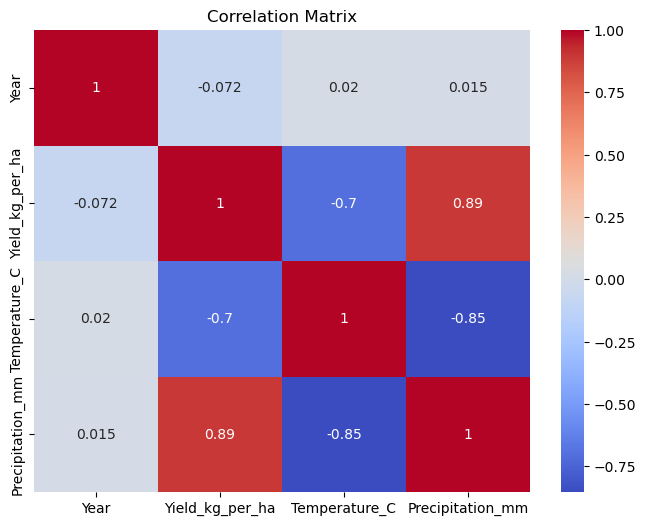

In [27]:
corr = df_merged.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [29]:
print(df_merged[["Yield_kg_per_ha", "Temperature_C", "Precipitation_mm"]].corr())


                  Yield_kg_per_ha  Temperature_C  Precipitation_mm
Yield_kg_per_ha          1.000000      -0.702721          0.891439
Temperature_C           -0.702721       1.000000         -0.852859
Precipitation_mm         0.891439      -0.852859          1.000000


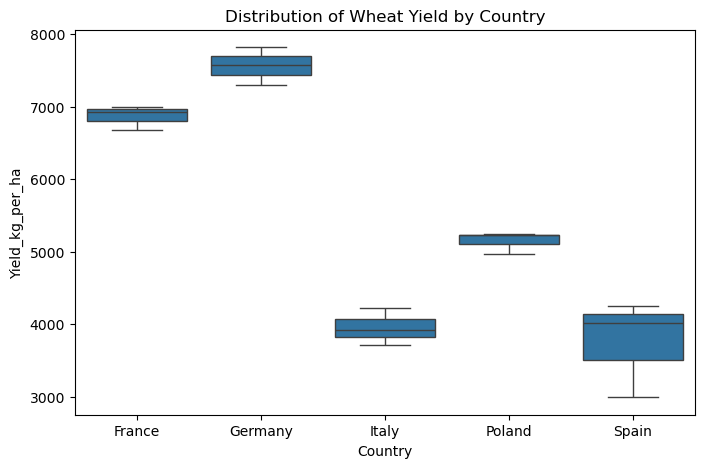

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Country", y="Yield_kg_per_ha", data=df_merged)
plt.title("Distribution of Wheat Yield by Country")
plt.show()

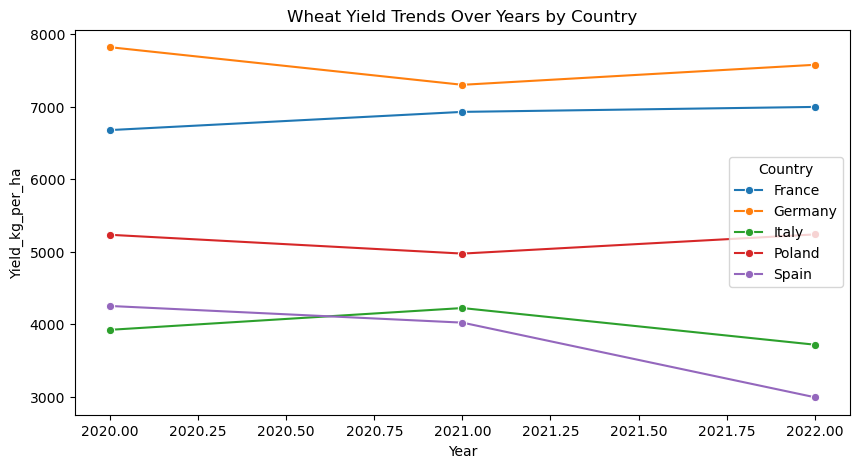

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Yield_kg_per_ha", hue="Country", marker="o", data=df_merged)
plt.title("Wheat Yield Trends Over Years by Country")
plt.show()

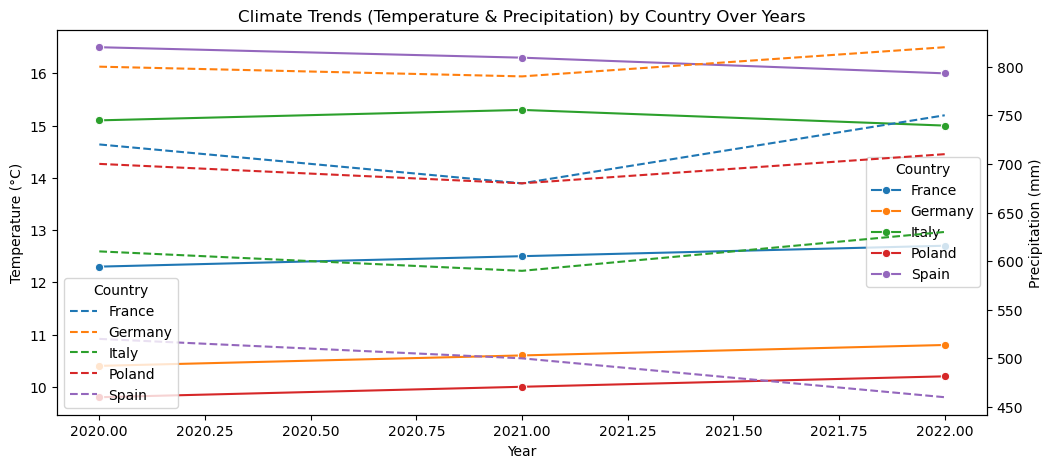

In [35]:
fig, ax1 = plt.subplots(figsize=(12,5))

sns.lineplot(x="Year", y="Temperature_C", hue="Country", marker="o", data=df_merged, ax=ax1)
ax1.set_ylabel("Temperature (°C)")

ax2 = ax1.twinx()
sns.lineplot(x="Year", y="Precipitation_mm", hue="Country", data=df_merged, ax=ax2, linestyle="--")
ax2.set_ylabel("Precipitation (mm)")

plt.title("Climate Trends (Temperature & Precipitation) by Country Over Years")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
X = df_merged[["Temperature_C", "Precipitation_mm"]]
y = df_merged["Yield_kg_per_ha"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test_scaled)


In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 score): {r2:.2f}")

Mean Squared Error (MSE): 625670.26
R-squared (R2 score): -0.36


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [55]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

In [57]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt:.2f}")
print(f"Decision Tree R2: {r2_dt:.2f}")

Decision Tree MSE: 79534.28
Decision Tree R2: 0.83


In [59]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [61]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R2: {r2_rf:.2f}")

Random Forest MSE: 72310.12
Random Forest R2: 0.84


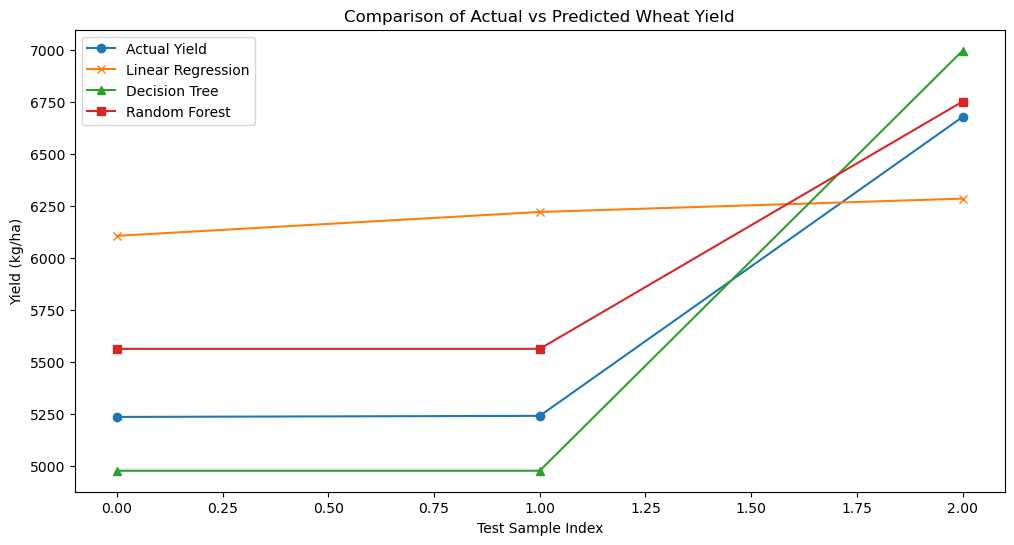

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

# Вистински вредности
plt.plot(y_test.values, label="Actual Yield", marker='o')

# Предвидувања
plt.plot(y_pred, label="Linear Regression", marker='x')
plt.plot(y_pred_dt, label="Decision Tree", marker='^')
plt.plot(y_pred_rf, label="Random Forest", marker='s')

plt.title("Comparison of Actual vs Predicted Wheat Yield")
plt.xlabel("Test Sample Index")
plt.ylabel("Yield (kg/ha)")
plt.legend()
plt.show()


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [69]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2')

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [70]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation R2 score:", grid_search.best_score_)

Best parameters found: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation R2 score: -0.8732969992332069


In [71]:
best_rf = grid_search.best_estimator_

In [75]:
y_pred_best_rf = best_rf.predict(X_test_scaled)

In [77]:
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest MSE: {mse_best_rf:.2f}")
print(f"Optimized Random Forest R2: {r2_best_rf:.2f}")

Optimized Random Forest MSE: 19727.67
Optimized Random Forest R2: 0.96


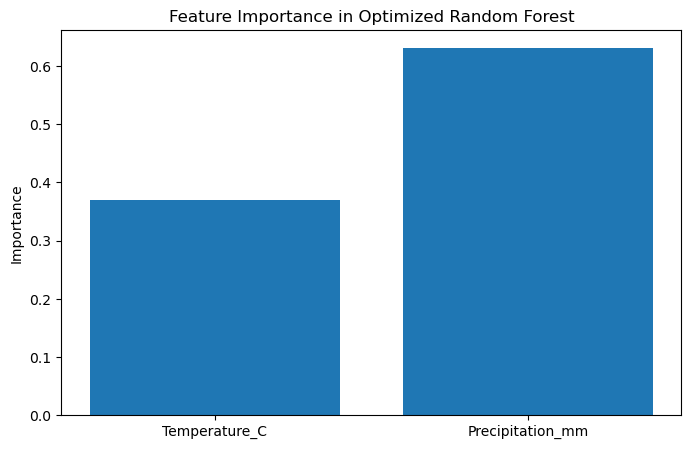

In [79]:
importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.bar(features, importances)
plt.title("Feature Importance in Optimized Random Forest")
plt.ylabel("Importance")
plt.show()